# Importa dataframe original

In [1]:
import pandas as pd
df_ori = pd.read_csv('d:\\Ricardo\\Downloads\\microdados_Enade_2017\\3.DADOS\\MICRODADOS_ENADE_2017.txt', delimiter=';', decimal=',')
df_ori.shape

c:\users\ricar\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (29,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(537436, 150)

# Filtra o curso de sistemas de informação

In [2]:
df_SI = df_ori[df_ori['CO_GRUPO']==4006]
#df_SI = df_ori

df_SI.shape

(14990, 150)

# Cria a coluna de GAP entre a formatura do EM e do ingresso no ES

In [3]:
df_SI['GAP'] = df_SI['ANO_IN_GRAD']-df_SI['ANO_FIM_EM']
df_SI.shape

c:\users\ricar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(14990, 151)

# Converte categoria para somente publioca ou privada

In [4]:
def tipoIES(x):
    if x==1 or x==2 or x==3:
        return "Pub"
    else:
        return "Pri"

df_SI['TP_IES'] = df_SI["CO_CATEGAD"].apply(tipoIES)


c:\users\ricar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Colunas de interesse

In [5]:
#percepcao da proba
#'CO_RS_I2','CO_RS_I3','CO_RS_I4','CO_RS_I5','CO_RS_I6','CO_RS_I7','CO_RS_I8','CO_RS_I9'
#exclusivo licenciatura
#'QE_I69', 'QE_I70','QE_I71','QE_I72','QE_I73','QE_I74','QE_I75','QE_I76','QE_I77','QE_I78','QE_I79','QE_I80','QE_I81',
#lista com as variaveis de entrada do questionario + informações pessoias
in_numericas = ['GAP','NU_IDADE']
#variaciveis ordinais
in_ordinais = ['QE_I04','QE_I05','QE_I07','QE_I08','QE_I09','QE_I10','QE_I22','QE_I23']
#I27 A I68 SÃO GRAUS DE CONCORDOANCIA
#variaveis que expressam grau de concordancia - 1 = Discordo Totalmente 2, 3 4 5 
#     6 = Concordo Totalmente 7 = Não sei responder.8 = Não se aplica.
in_concordancia = ['QE_I27','QE_I28','QE_I29','QE_I30',
                                     'QE_I31','QE_I32','QE_I33','QE_I34','QE_I35','QE_I36','QE_I37','QE_I38',
                                     'QE_I39','QE_I40','QE_I41','QE_I42','QE_I43',
                                     'QE_I44','QE_I45','QE_I46','QE_I47','QE_I48','QE_I49','QE_I50','QE_I51',
                                     'QE_I52','QE_I53','QE_I54','QE_I55','QE_I56',
                                     'QE_I57','QE_I58','QE_I59','QE_I60','QE_I61','QE_I62','QE_I63','QE_I64',
                                     'QE_I65','QE_I66','QE_I67','QE_I68']
#variaveis nominais                               
in_nominais = ['TP_SEXO','TP_IES','CO_MODALIDADE',
                                     'CO_TURNO_GRADUACAO','QE_I01','QE_I02','QE_I03','QE_I06',
                                     'QE_I11','QE_I12','QE_I13','QE_I14','QE_I15','QE_I16',
                                     'QE_I17','QE_I18','QE_I19','QE_I20','QE_I21','QE_I24','QE_I25',
                                     'QE_I26']
in_nominais = in_nominais + in_concordancia
# TODO cols_entrada = in_numericas + in_ordinais + in_concordancia + in_nominais + ['NT_GER']
cols_entrada = in_numericas + in_ordinais + in_nominais + ['NT_GER']
#cria um df com as colunas de entrada e nota 
df_SI_cols = df_SI[cols_entrada]
#tira a nota das colunas de entrada, pois ela é saida
cols_entrada.remove('NT_GER')

df_SI_cols.shape

(14990, 75)

In [6]:
df_SI_cols

GAP  NU_IDADE QE_I04 QE_I05 QE_I07 QE_I08 QE_I09 QE_I10 QE_I22  \
7987     8.0        33      B      E      B      C      F      E      C   
7988     2.0        23      D      D      C      E      D      E      A   
7989     2.0        24      D      D      C      F      D      E      A   
7990     4.0        27      F      D      C      F      D      E      B   
7991     1.0        25      C      C      B      D      E      E      B   
...      ...       ...    ...    ...    ...    ...    ...    ...    ...   
537264  12.0        32    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
537265  17.0        37    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
537266  10.0        30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
537267   5.0        26    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
537268   1.0        21    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       QE_I23  ... QE_I60 QE_I61  QE_I62  QE_I63 QE_I64 QE_I65 QE_I66 QE_I67  \
7987        B  ...    1.0    3.0     6.0     5.0    6.0    6.0    6.0    1.0   
7988        C  ...    5.0    4.0     2.0     3.0    4.0    5.0    5.0    2.0   
7989        B  ...    4.0    3.0     4.0     4.0    5.0    5.0    2.0    3.0   
7990        B  ...    3.0    2.0     3.0     4.0    4.0    5.0    7.0    2.0   
7991        E  ...    6.0    6.0     6.0     6.0    6.0    6.0    5.0    5.0   
...       ...  ...    ...    ...     ...     ...    ...    ...    ...    ...   
537264    NaN  ...    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN   
537265    NaN  ...    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN   
537266    NaN  ...    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN   
537267    NaN  ...    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN   
537268    NaN  ...    NaN    NaN     NaN     NaN    NaN    NaN    NaN    NaN   

       QE_I68 NT_GER  
7987      6.0   53.4  
7988      2.0   42.5  
7989      3.0   62.1  
7990      5.0   54.1  
7991      6.0   33.6  
...       ...    ...  
537264    NaN    NaN  
537265    NaN    NaN  
537266    NaN    NaN  
537267    NaN    NaN  
537268    NaN    NaN  

[14990 rows x 75 columns]

# Limpeza

In [7]:
#se tem registro em branco, apaga a linha inteira
df_SI_cols = df_SI_cols.dropna()
df_SI_cols.shape

(11892, 75)

In [8]:
df_SI_cols

GAP  NU_IDADE QE_I04 QE_I05 QE_I07 QE_I08 QE_I09 QE_I10 QE_I22 QE_I23  \
7987    8.0        33      B      E      B      C      F      E      C      B   
7988    2.0        23      D      D      C      E      D      E      A      C   
7989    2.0        24      D      D      C      F      D      E      A      B   
7990    4.0        27      F      D      C      F      D      E      B      B   
7991    1.0        25      C      C      B      D      E      E      B      E   
...     ...       ...    ...    ...    ...    ...    ...    ...    ...    ...   
533718  2.0        23      B      D      A      C      D      E      E      B   
533719  1.0        25      D      C      A      B      E      E      A      B   
533720  7.0        27      B      D      B      C      C      C      A      B   
533721  2.0        25      B      B      D      A      B      A      B      D   
533722  2.0        22      A      B      E      A      A      A      E      E   

        ... QE_I60 QE_I61  QE_I62  QE_I63 QE_I64 QE_I65 QE_I66 QE_I67 QE_I68  \
7987    ...    1.0    3.0     6.0     5.0    6.0    6.0    6.0    1.0    6.0   
7988    ...    5.0    4.0     2.0     3.0    4.0    5.0    5.0    2.0    2.0   
7989    ...    4.0    3.0     4.0     4.0    5.0    5.0    2.0    3.0    3.0   
7990    ...    3.0    2.0     3.0     4.0    4.0    5.0    7.0    2.0    5.0   
7991    ...    6.0    6.0     6.0     6.0    6.0    6.0    5.0    5.0    6.0   
...     ...    ...    ...     ...     ...    ...    ...    ...    ...    ...   
533718  ...    5.0    4.0     4.0     4.0    4.0    3.0    4.0    4.0    6.0   
533719  ...    6.0    6.0     5.0     6.0    6.0    7.0    7.0    7.0    6.0   
533720  ...    6.0    6.0     5.0     5.0    6.0    8.0    4.0    5.0    5.0   
533721  ...    5.0    5.0     5.0     5.0    5.0    7.0    6.0    6.0    6.0   
533722  ...    6.0    6.0     6.0     6.0    6.0    6.0    6.0    6.0    6.0   

       NT_GER  
7987     53.4  
7988     42.5  
7989     62.1  
7990     54.1  
7991     33.6  
...       ...  
533718   51.1  
533719   53.0  
533720   36.9  
533721   35.3  
533722   60.2  

[11892 rows x 75 columns]

# Transforma as notas numericas em conceitos

In [9]:
#cria um dataframe novo consolidado
df_consolidado = df_SI_cols.copy()
#cria um dataframe tratato
df_tratado = df_SI_cols.copy()
#calcula os quartis
q1 = df_consolidado.NT_GER.quantile(0.25)
q2 = df_consolidado.NT_GER.quantile(0.5)
q3 = df_consolidado.NT_GER.quantile(0.75) 
print(q1," ",q2," ",q3," ")   
def discretizanota(nota):
    if nota<q1: #quartil 25
        return 'A'
    elif nota>=q1 and nota<q2:
        return 'B'
    elif nota>=q2 and nota<q3:
        return 'C'
    else:
        return 'D'
#
df_tratado['NT_CONCEITO'] = df_consolidado['NT_GER'].apply(discretizanota)

35.5   44.6   53.8  


# Transforma as variaveis categoricas

In [10]:
from sklearn.preprocessing import LabelEncoder
in_dummies = []
#trata as variaveis categoricas ordinais
def trata_ordinais(col):
    global df_tratado
    global df_consolidado
    #Está sendo usada para variáveis categóricas ordinais, transformando-as em quantitativas e discretas
    le = LabelEncoder()
    # coluna codificada e o objeto le para converter os códigos em rótulos novamente.
    df_tratado[col]= le.fit_transform(df_consolidado[col])
    
#Trata variáveis categóricas nominais, transformando-as em quantitativas discretas
def trata_nominais(col):
    global df_tratado
    global df_consolidado
    global in_dummies
    dummy_vars = 0
    #if(len(df_consolidado[col].unique())==2):
        #se ha apenas duas colunas, elimina a primeira coluna e cria apenas uma coluna booleana
    #    dummy_vars = pd.get_dummies(df_consolidado[col],drop_first=True)
    #else:
    dummy_vars = pd.get_dummies(df_consolidado[col],drop_first=False)
    num_opcoes = len(dummy_vars)
    for col_dummy in dummy_vars.columns:
        col_dummy_name = col+"_"+str(col_dummy)
        in_dummies.append(col_dummy_name)
        dummy_vars.rename(columns = {col_dummy:col_dummy_name}, inplace = True)
    df_tratado= pd.concat([df_tratado, dummy_vars], axis=1)


#transformas as variáveis categóricas em números
for col in in_ordinais:
    trata_ordinais(col)
    
#só copia as variáveis numericas para o novo dataset
for col in in_numericas:
    df_tratado[col] = df_consolidado[col].copy()
    
#transformas as variáveis nominais em dummies
for col in in_nominais:
    trata_nominais(col)

df_tratado

GAP  NU_IDADE  QE_I04  QE_I05  QE_I07  QE_I08  QE_I09  QE_I10  QE_I22  \
7987    8.0        33       1       4       1       2       5       4       2   
7988    2.0        23       3       3       2       4       3       4       0   
7989    2.0        24       3       3       2       5       3       4       0   
7990    4.0        27       5       3       2       5       3       4       1   
7991    1.0        25       2       2       1       3       4       4       1   
...     ...       ...     ...     ...     ...     ...     ...     ...     ...   
533718  2.0        23       1       3       0       2       3       4       4   
533719  1.0        25       3       2       0       1       4       4       0   
533720  7.0        27       1       3       1       2       2       2       0   
533721  2.0        25       1       1       3       0       1       0       1   
533722  2.0        22       0       1       4       0       0       0       4   

        QE_I23  ... QE_I67_7.0 QE_I67_8.0  QE_I68_1.0  QE_I68_2.0 QE_I68_3.0  \
7987         1  ...          0          0           0           0          0   
7988         2  ...          0          0           0           1          0   
7989         1  ...          0          0           0           0          1   
7990         1  ...          0          0           0           0          0   
7991         4  ...          0          0           0           0          0   
...        ...  ...        ...        ...         ...         ...        ...   
533718       1  ...          0          0           0           0          0   
533719       1  ...          1          0           0           0          0   
533720       1  ...          0          0           0           0          0   
533721       3  ...          0          0           0           0          0   
533722       4  ...          0          0           0           0          0   

       QE_I68_4.0 QE_I68_5.0 QE_I68_6.0 QE_I68_7.0 QE_I68_8.0  
7987            0          0          1          0          0  
7988            0          0          0          0          0  
7989            0          0          0          0          0  
7990            0          1          0          0          0  
7991            0          0          1          0          0  
...           ...        ...        ...        ...        ...  
533718          0          0          1          0          0  
533719          0          0          1          0          0  
533720          0          1          0          0          0  
533721          0          0          1          0          0  
533722          0          0          1          0          0  

[11892 rows x 558 columns]

In [11]:
df_tratado.shape

(11892, 558)

In [12]:
in_dummies

['TP_SEXO_F',
 'TP_SEXO_M',
 'TP_IES_Pri',
 'TP_IES_Pub',
 'CO_MODALIDADE_0',
 'CO_MODALIDADE_1',
 'CO_TURNO_GRADUACAO_1.0',
 'CO_TURNO_GRADUACAO_2.0',
 'CO_TURNO_GRADUACAO_3.0',
 'CO_TURNO_GRADUACAO_4.0',
 'QE_I01_A',
 'QE_I01_B',
 'QE_I01_C',
 'QE_I01_D',
 'QE_I01_E',
 'QE_I02_A',
 'QE_I02_B',
 'QE_I02_C',
 'QE_I02_D',
 'QE_I02_E',
 'QE_I02_F',
 'QE_I03_A',
 'QE_I03_B',
 'QE_I03_C',
 'QE_I06_A',
 'QE_I06_B',
 'QE_I06_C',
 'QE_I06_D',
 'QE_I06_E',
 'QE_I06_F',
 'QE_I11_A',
 'QE_I11_B',
 'QE_I11_C',
 'QE_I11_D',
 'QE_I11_E',
 'QE_I11_F',
 'QE_I11_G',
 'QE_I11_H',
 'QE_I11_I',
 'QE_I11_J',
 'QE_I11_K',
 'QE_I12_A',
 'QE_I12_B',
 'QE_I12_C',
 'QE_I12_D',
 'QE_I12_E',
 'QE_I12_F',
 'QE_I13_A',
 'QE_I13_B',
 'QE_I13_C',
 'QE_I13_D',
 'QE_I13_E',
 'QE_I13_F',
 'QE_I14_A',
 'QE_I14_B',
 'QE_I14_C',
 'QE_I14_D',
 'QE_I14_E',
 'QE_I14_F',
 'QE_I15_A',
 'QE_I15_B',
 'QE_I15_C',
 'QE_I15_D',
 'QE_I15_E',
 'QE_I15_F',
 'QE_I16_11.0',
 'QE_I16_12.0',
 'QE_I16_13.0',
 'QE_I16_14.0',
 'QE_I16_15.0',

# Árvore de decisão
## Separa teste e treinamento

In [13]:
from sklearn.model_selection import train_test_split
#separa teste e treino

#colsentrada=['NU_ANO', 'CO_IES','CO_GRUPO','CO_MODALIDADE','M','CO_RS_I1_M','CO_RS_I2_M', 'QE_I06_M','QE_I08_M','QE_I09_M','QE_I10_M','QE_I23_M','QE_I25_M','QE_I26_M','QE_I27_M']
in_train = in_numericas + in_ordinais + in_dummies
X_train, X_test, y_train, y_test = train_test_split(df_tratado[in_train],
                                                    df_tratado['NT_CONCEITO'],
                                                    test_size=0.2)

## Monta classificador

In [14]:
#importações
from sklearn import tree
from sklearn.tree import export_text

#cria um objeto classificador 
arvore = tree.DecisionTreeClassifier(criterion='gini')
#Realiza o treinamento - X é o conjunto de entrada e Y é a respectiva classificação.
classificador = arvore.fit(X_train, y_train)
#imprime a arovre no formato texto
caracteristicas = list(in_train)
r = export_text(classificador, feature_names=caracteristicas)
#print(r)

## Imprime árvore

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7), dpi=200)
tree.plot_tree(arvore ,filled=True, feature_names=in_train, max_depth=3, 
               fontsize=10, class_names = ['A', 'B', 'C', 'D'])
plt.show()


In [16]:
from sklearn import metrics
#USa a arvore para classificar o dataset de test. 
y_pred = classificador.predict(X_test)

#compara as classificações calculadas pela árvore y_pred com a classificações original do dataset y_Test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.2597730138713745


# Correlação

In [17]:

df_correlacao=pd.concat([df_tratado['NT_GER'],df_tratado[in_train]], axis=1)
correlacao = df_correlacao.corr()
cor_absoluto = abs(correlacao['NT_GER'])
cor_absoluto = cor_absoluto.sort_values()
num_correlacoes=12
cor_absoluto[-num_correlacoes:]

QE_I26_F      0.104887
QE_I13_B      0.107574
QE_I11_C      0.110843
QE_I14_B      0.111772
QE_I23        0.113350
QE_I13_A      0.124929
QE_I11_E      0.125240
TP_IES_Pri    0.141875
TP_IES_Pub    0.141875
QE_I11_A      0.146351
QE_I08        0.151213
NT_GER        1.000000
Name: NT_GER, dtype: float64

In [18]:
cor_absoluto.index[-num_correlacoes:]

Index(['QE_I26_F', 'QE_I13_B', 'QE_I11_C', 'QE_I14_B', 'QE_I23', 'QE_I13_A',
       'QE_I11_E', 'TP_IES_Pri', 'TP_IES_Pub', 'QE_I11_A', 'QE_I08', 'NT_GER'],
      dtype='object')

In [19]:
cor_absoluto.index[-40:]

Index(['QE_I58_4.0', 'QE_I52_8.0', 'QE_I16_32.0', 'QE_I46_7.0', 'QE_I54_6.0',
       'QE_I15_E', 'QE_I26_E', 'QE_I16_53.0', 'QE_I53_8.0', 'QE_I57_5.0',
       'CO_TURNO_GRADUACAO_3.0', 'QE_I22', 'QE_I07', 'QE_I50_8.0', 'QE_I17_A',
       'QE_I58_6.0', 'QE_I24_C', 'QE_I05', 'QE_I18_B', 'QE_I13_D', 'QE_I11_B',
       'QE_I16_31.0', 'QE_I25_E', 'CO_TURNO_GRADUACAO_4.0', 'QE_I14_A',
       'QE_I04', 'QE_I26_B', 'QE_I17_B', 'QE_I26_F', 'QE_I13_B', 'QE_I11_C',
       'QE_I14_B', 'QE_I23', 'QE_I13_A', 'QE_I11_E', 'TP_IES_Pri',
       'TP_IES_Pub', 'QE_I11_A', 'QE_I08', 'NT_GER'],
      dtype='object')

In [20]:
correlacao_relevantes=df_correlacao[cor_absoluto.index[-num_correlacoes:]].corr()
correlacao_relevantes

QE_I26_F  QE_I13_B  QE_I11_C  QE_I14_B    QE_I23  QE_I13_A  \
QE_I26_F    1.000000  0.038153 -0.020090  0.035813  0.075326 -0.061293   
QE_I13_B    0.038153  1.000000 -0.046929  0.083338  0.077576 -0.468834   
QE_I11_C   -0.020090 -0.046929  1.000000  0.004103  0.017308  0.068082   
QE_I14_B    0.035813  0.083338  0.004103  1.000000  0.006691 -0.133860   
QE_I23      0.075326  0.077576  0.017308  0.006691  1.000000 -0.099864   
QE_I13_A   -0.061293 -0.468834  0.068082 -0.133860 -0.099864  1.000000   
QE_I11_E    0.010685 -0.062122 -0.152214 -0.058123 -0.023938  0.128379   
TP_IES_Pri  0.020125 -0.225858  0.189088 -0.135663 -0.089721  0.331547   
TP_IES_Pub -0.020125  0.225858 -0.189088  0.135663  0.089721 -0.331547   
QE_I11_A   -0.019167  0.225763 -0.181777  0.141425  0.084586 -0.310866   
QE_I08      0.096510  0.019227 -0.132150  0.065926 -0.038852  0.013738   
NT_GER      0.104887  0.107574  0.110843  0.111772  0.113350 -0.124929   

            QE_I11_E  TP_IES_Pri  TP_IES_Pub  QE_I11_A    QE_I08    NT_GER  
QE_I26_F    0.010685    0.020125   -0.020125 -0.019167  0.096510  0.104887  
QE_I13_B   -0.062122   -0.225858    0.225858  0.225763  0.019227  0.107574  
QE_I11_C   -0.152214    0.189088   -0.189088 -0.181777 -0.132150  0.110843  
QE_I14_B   -0.058123   -0.135663    0.135663  0.141425  0.065926  0.111772  
QE_I23     -0.023938   -0.089721    0.089721  0.084586 -0.038852  0.113350  
QE_I13_A    0.128379    0.331547   -0.331547 -0.310866  0.013738 -0.124929  
QE_I11_E    1.000000    0.270507   -0.270507 -0.269567 -0.168819 -0.125240  
TP_IES_Pri  0.270507    1.000000   -1.000000 -0.943530  0.047576 -0.141875  
TP_IES_Pub -0.270507   -1.000000    1.000000  0.943530 -0.047576  0.141875  
QE_I11_A   -0.269567   -0.943530    0.943530  1.000000 -0.047193  0.146351  
QE_I08     -0.168819    0.047576   -0.047576 -0.047193  1.000000  0.151213  
NT_GER     -0.125240   -0.141875    0.141875  0.146351  0.151213  1.000000

In [21]:
import plotly.express as px
fig = px.imshow(correlacao_relevantes)
fig.show()
#

In [22]:
#correlacao_relevantes.style.background_gradient(cmap='coolwarm')
correlacao_relevantes.style.background_gradient(cmap='coolwarm').set_precision(2)

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

def my_box_plot(col_x, col_y,legendas=[], rotulos=[], rotacao=0 , is_dummy = False):
    df_plot = df_tratado[[col_x, col_y]].copy()
    my_order = df_plot[col_x].sort_values().unique()
    my_order_orig = my_order.copy()
    #se foi passado algum rotulo, substitui-se os valores q estao na coluna pelos rotulos, para melhor visualização dos graficos
    if rotulos: 
        df_plot[col_x] = df_plot[col_x].apply(lambda x: rotulos[x])
        lbl_order = []
        for item in my_order:
            lbl_order.append(rotulos[item])
        my_order = lbl_order
    #
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(col_x,fontsize=20)
    sns.boxplot(x=col_x, y=col_y, ax=axes[0],
            data=df_plot, order=my_order,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            showmeans=True, palette='Paired')
    axes[0].set_title("Nota geral por reposta",fontsize=18)
    axes[0].set_ylabel("Nota",fontsize=16)
    axes[0].set_xlabel(col_x,fontsize=0)
    ## 
    #
    sns.countplot(x=col_x, data=df_plot, ax=axes[1], palette='Paired', order=my_order)
    axes[1].set_ylabel("Quantitativo",fontsize=16)
    axes[1].set_title("Quantitativo por respostas",fontsize=18)
    axes[1].set_xlabel(col_x,fontsize=0)
    if legendas:
        axes[1].legend(legendas)
    for ax in axes:
        ax.tick_params(axis='x', labelsize=14, rotation=rotacao)
        ax.tick_params(axis='y', labelsize=14)
      
    conta = df_plot.groupby(col_x).count()[col_y].sort_index()
    media = df_plot.groupby(col_x).mean()[col_y].sort_index()
    devpadrao = df_plot.groupby(col_x).std()[col_y].sort_index()
    total = df_plot[col_x].count()
    respostas = 100*df_plot.groupby(col_x).count()[col_y].sort_index()/total
    cont_i = 0
    for el in my_order:
        my_col_correlacao = col_x
        if is_dummy:
            my_col_correlacao = col_x+"_"+str(my_order_orig[cont_i])
            
        print("%s;%d;%.1f;%.1f(%.1f);%.2f"%(el, conta[el],respostas[el],media[el],devpadrao[el], correlacao['NT_GER'][my_col_correlacao]))
        cont_i = cont_i + 1
    print("nota media: %.1f %.1f"%(df_plot[col_y].mean(), df_plot[col_y].std()))
    print("--------------------")
    #for el in my_order:
    #    print("%s : %.1f%% dos candidatos que obteve nota média %.1f+-%.1f"%(el, respostas[el],media[el],devpadrao[el]))
    
    
    print("--------------------")
    print("Media: %.1f %.1f %.1f"%(max(media), min(media), max(media)-min(media)))

In [24]:
#for col in cor_absoluto.index[-20:-1]:
#    print(col)
#    my_box_plot(col, 'NT_GER')


# Estudo sobre as variáveis levantadas

In [25]:
my_box_plot('TP_IES', 'NT_GER', is_dummy=True)

Pri;8788;73.9;43.6(12.7);-0.14
Pub;3104;26.1;47.9(13.8);0.14
nota media: 44.7 13.2
--------------------
--------------------
Media: 47.9 43.6 4.2


EAD;757;6.4;45.0(13.9);0.00
Presencial;11135;93.6;44.7(13.1);-0.00
nota media: 44.7 13.2
--------------------
--------------------
Media: 45.0 44.7 0.2


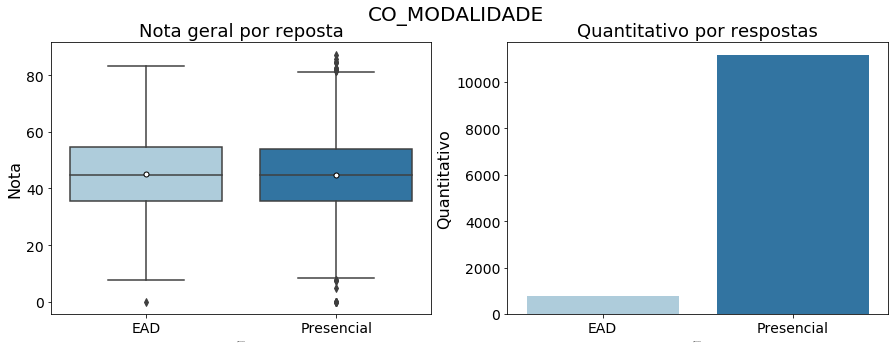

In [26]:
my_box_plot('CO_MODALIDADE', 'NT_GER', rotulos={0: 'EAD', 1:'Presencial'}, is_dummy=True)

Abaixo de 1,5;1719;14.5;41.5(12.5);0.15
De 1,5 a 3;3275;27.5;43.7(12.6);0.15
De 3 a 4,5;2895;24.3;44.9(12.7);0.15
De 4,5 a 6;1582;13.3;45.8(13.3);0.15
De 6 a 10;1602;13.5;46.7(13.8);0.15
De 10 a 30;765;6.4;49.4(14.3);0.15
Acima de 30;54;0.5;51.7(15.4);0.15
nota media: 44.7 13.2
--------------------
--------------------
Media: 51.7 41.5 10.3


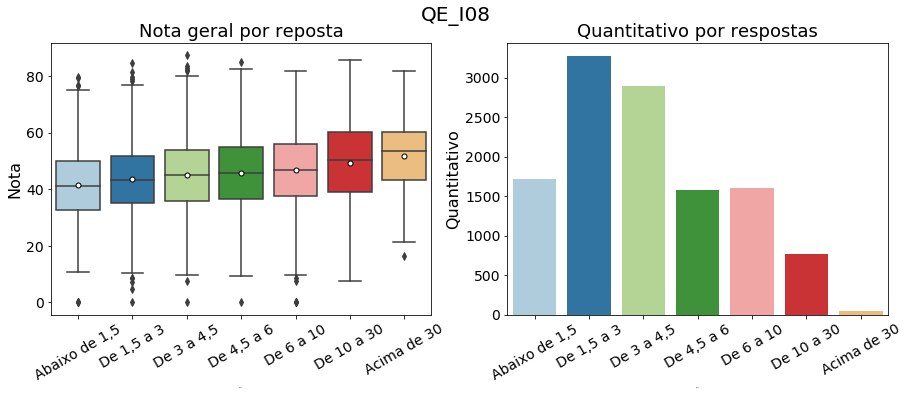

In [27]:
faixa_salarial = {0:'Abaixo de 1,5', 1:'De 1,5 a 3', 2:'De 3 a 4,5', 3:'De 4,5 a 6', 4:'De 6 a 10', 5:'De 10 a 30', 6:'Acima de 30'}
my_box_plot('QE_I08', 'NT_GER', rotulos=faixa_salarial, rotacao=30)

In [28]:

rot_bolsa = {'A':'Nenhum, curso gratuito', 'B':'Nenhum, curso não gratuito', 'C':'ProUni Integral', 
             'D':'ProUni parcial', 'E':'FIES', 'F':'ProUni Parcial e FIES', 'G':'Bolsa estadual/municipal',
             'H': 'Bolsa IES', 'I':'Outras bolsas','J':'Financiamento IES', 
             'K':'Financimamento bancário'}

my_box_plot('QE_I11', 'NT_GER', rotulos=rot_bolsa, rotacao=80, is_dummy=True)

Nenhum, curso gratuito;2896;24.4;48.1(13.8);0.15
Nenhum, curso não gratuito;3329;28.0;43.0(13.0);-0.08
ProUni Integral;1107;9.3;49.3(12.9);0.11
ProUni parcial;283;2.4;45.4(11.4);0.01
FIES;2190;18.4;41.3(11.9);-0.13
ProUni Parcial e FIES;229;1.9;45.6(12.7);0.01
Bolsa estadual/municipal;350;2.9;42.3(12.1);-0.03
Bolsa IES;1024;8.6;44.6(12.3);-0.00
Outras bolsas;311;2.6;44.1(13.1);-0.01
Financiamento IES;125;1.1;42.0(12.6);-0.02
Financimamento bancário;48;0.4;40.5(11.0);-0.02
nota media: 44.7 13.2
--------------------
--------------------
Media: 49.3 40.5 8.8


In [29]:
rot_bolsaacad = {'A':'Nenhuma', 'B':'Iniciação científica', 'C':'Extensão', 
             'D':'Monitoria', 'E':'PET', 'F':'Outras'}
my_box_plot('QE_I13', 'NT_GER',rotulos=rot_bolsaacad,rotacao=45, is_dummy=True)

Nenhuma;9646;81.1;44.0(12.9);-0.12
Iniciação científica;579;4.9;51.0(13.7);0.11
Extensão;350;2.9;48.3(12.9);0.05
Monitoria;382;3.2;50.7(14.1);0.08
PET;70;0.6;52.2(13.3);0.04
Outras;865;7.3;44.7(12.6);-0.00
nota media: 44.7 13.2
--------------------
--------------------
Media: 52.2 44.0 8.2


Sem intercâmbio;11503;96.7;44.5(13.0);-0.09
Ciência sem Fronteiras;216;1.8;55.6(13.4);0.11
Intercâmbio Gov. Federal;7;0.1;49.2(28.5);0.01
Intercâmbio Gov. Estadual;2;0.0;40.5(18.8);-0.00
Intercâmbio da IES;52;0.4;45.8(14.7);0.01
Outro intercâmbio;112;0.9;45.4(14.6);0.01
nota media: 44.7 13.2
--------------------
--------------------
Media: 55.6 40.5 15.1


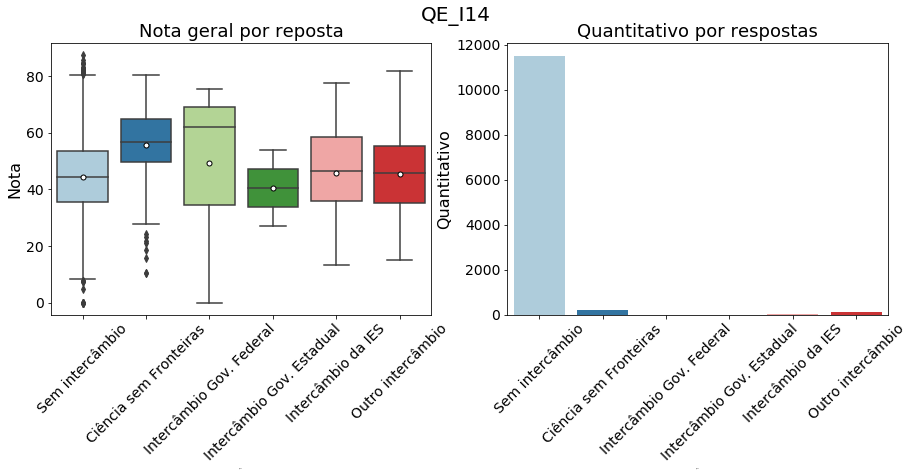

In [30]:
rot_intercambio = {
'A':'Sem intercâmbio',
'B':'Ciência sem Fronteiras',
'C':'Intercâmbio Gov. Federal',
'D':'Intercâmbio Gov. Estadual',
'E':'Intercâmbio da IES',
'F': 'Outro intercâmbio'}
my_box_plot('QE_I14', 'NT_GER', rotulos=rot_intercambio,rotacao=45, is_dummy=True)

RO;121;1.0;39.2(12.9);-0.04
AC;76;0.6;45.2(12.9);0.00
AM;126;1.1;44.3(12.6);-0.00
RR;36;0.3;37.4(10.7);-0.03
PA;492;4.1;42.1(11.1);-0.04
AP;21;0.2;40.5(13.8);-0.01
TO;73;0.6;44.5(11.7);-0.00
MA;149;1.3;42.2(13.0);-0.02
PI;157;1.3;39.5(12.1);-0.05
CE;412;3.5;46.6(13.0);0.03
RN;93;0.8;45.0(12.3);0.00
PB;121;1.0;45.7(12.7);0.01
PE;523;4.4;46.1(13.2);0.02
AL;223;1.9;42.8(12.3);-0.02
SE;93;0.8;44.7(14.7);-0.00
BA;473;4.0;45.6(13.2);0.01
MG;1945;16.4;47.3(13.4);0.08
ES;284;2.4;50.0(12.9);0.06
RJ;1255;10.6;45.2(13.7);0.01
SP;2356;19.8;43.5(12.9);-0.05
PR;543;4.6;45.4(13.1);0.01
SC;664;5.6;44.5(12.7);-0.01
RS;616;5.2;45.9(12.7);0.02
MS;87;0.7;47.5(13.5);0.02
MT;154;1.3;43.3(12.3);-0.01
GO;398;3.3;42.5(13.3);-0.03
DF;347;2.9;39.7(12.3);-0.07
Não se aplica;54;0.5;41.9(13.3);-0.01
nota media: 44.7 13.2
--------------------
--------------------
Media: 50.0 37.4 12.7


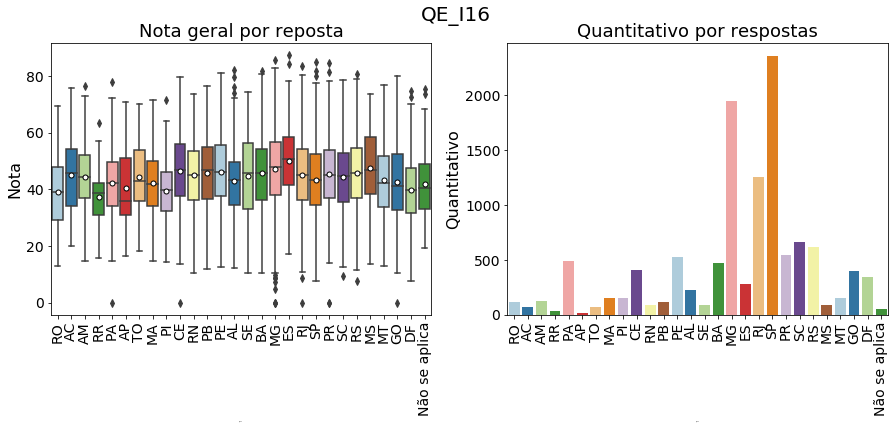

In [31]:
rot_uf={11: 'RO',28 : 'SE',
12 : 'AC',29 : 'BA',
13 : 'AM',31 : 'MG',
14 : 'RR',32 :  'ES',
15 : 'PA',  33 : 'RJ',
16 : 'AP', 35 : 'SP',
17 : 'TO',41 : 'PR',
21 : 'MA',42 : 'SC',
22 : 'PI' ,43 :  'RS',
23 : 'CE',50 : 'MS',
24 : 'RN',51 : 'MT',
25 : 'PB', 52 : 'GO',
26 : 'PE',53 : 'DF',
27 :'AL' ,99 : 'Não se aplica'}
my_box_plot('QE_I16', 'NT_GER', rotulos=rot_uf,rotacao=90, is_dummy=True)

0;9947;83.6;44.3(13.0);0.08
1;1945;16.4;47.3(13.4);0.08
nota media: 44.7 13.2
--------------------
--------------------
Media: 47.3 44.3 3.0


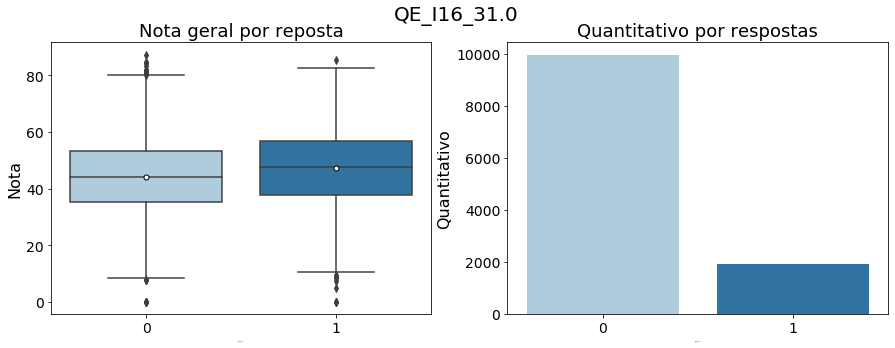

In [32]:
my_box_plot('QE_I16_31.0', 'NT_GER')

Total pública;7906;66.5;44.1(12.9);-0.07
Total particular;2884;24.3;47.1(13.5);0.10
Total exterior;17;0.1;39.7(11.9);-0.01
Maioria pública;576;4.8;41.8(13.1);-0.05
Maioria particular;485;4.1;44.8(12.9);0.00
Parcial exterior;24;0.2;48.0(12.5);0.01
nota media: 44.7 13.2
--------------------
--------------------
Media: 48.0 39.7 8.3


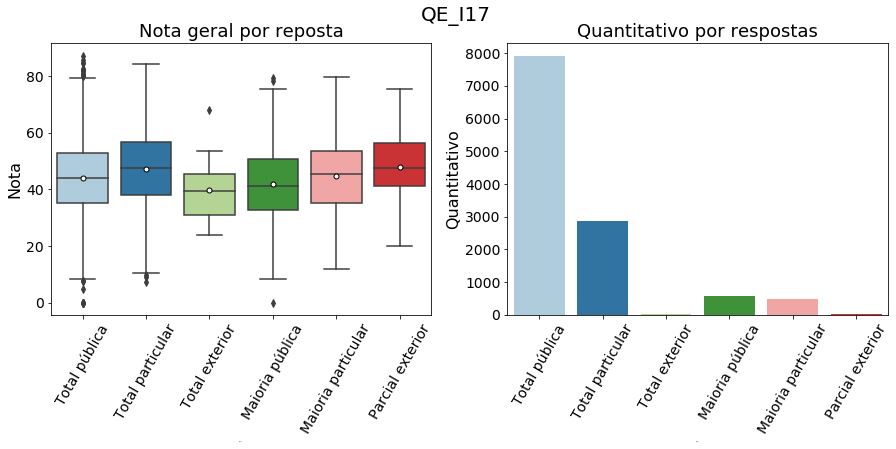

In [33]:
rot_tipoescola = {'A' : 'Total pública',
'B' : 'Total particular',
'C' : 'Total exterior',
'D' : 'Maioria pública',
'E' : 'Maioria particular',
'F' : 'Parcial exterior'}
my_box_plot('QE_I17', 'NT_GER', rotulos=rot_tipoescola, rotacao=60, is_dummy=True)
#Em que tipo de escola você cursou o ensino médio?

0h;868;7.3;43.5(13.7);0.11
De 1 a 3h;5215;43.9;43.1(12.9);0.11
De 4 a 7h;3458;29.1;45.9(13.2);0.11
De 8 a 12h;1285;10.8;47.1(12.5);0.11
>12h;1066;9.0;47.1(13.6);0.11
nota media: 44.7 13.2
--------------------
--------------------
Media: 47.1 43.1 4.0


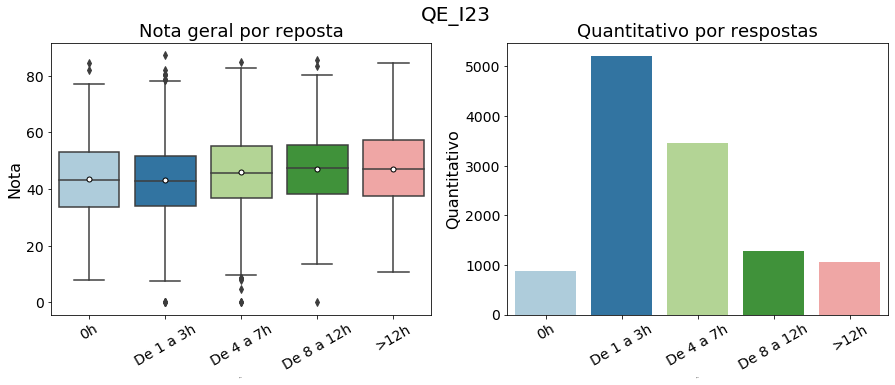

In [34]:
rot_horasded = {0 : '0h',
1 : 'De 1 a 3h',
2 : 'De 4 a 7h',
3 : 'De 8 a 12h',
4 : '>12h'}
my_box_plot('QE_I23', 'NT_GER', rotulos=rot_horasded, rotacao=30)

Gratuidade;1495;12.6;46.2(13.6);0.04
Preço da mensalidade;920;7.7;40.3(12.4);-0.10
Proximidade da residência;2198;18.5;43.6(12.8);-0.04
Proximidade do trabalho;291;2.4;45.1(13.1);0.00
Facilidade de acesso;682;5.7;41.2(12.9);-0.07
Qualidade/reputação;4432;37.3;46.5(13.1);0.10
Única aprovação;175;1.5;44.1(14.1);-0.01
Possibilidade de bolsa ;783;6.6;45.7(12.4);0.02
Outro;916;7.7;42.9(12.9);-0.04
nota media: 44.7 13.2
--------------------
--------------------
Media: 46.5 40.3 6.3


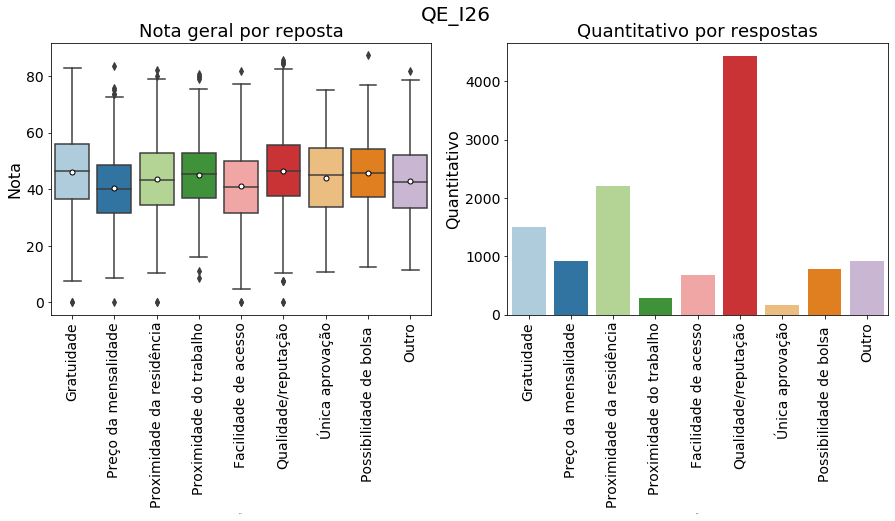

In [35]:
motivos = {'A' :'Gratuidade',
'B' : 'Preço da mensalidade',
'C' : 'Proximidade da residência',
'D' : 'Proximidade do trabalho',
'E' : 'Facilidade de acesso',
'F' : 'Qualidade/reputação',
'G' : 'Única aprovação',
'H' : 'Possibilidade de bolsa ',
'I' : 'Outro'}
my_box_plot('QE_I26', 'NT_GER', rotulos=motivos,rotacao=90, is_dummy=True)

In [36]:
print("Correlação entre nota e trabalho: ", correlacao['NT_GER']['QE_I10'])

Correlação entre nota e trabalho:  -0.008895565741973808


Não trabalha;2979;25.1;45.2(13.2);-0.01
Eventualmente;507;4.3;43.0(13.5);-0.01
< 20h/sem;442;3.7;43.2(13.2);-0.01
De 21 a 39h/sem;1273;10.7;45.3(13.3);-0.01
> 40h/sem;6691;56.3;44.7(13.0);-0.01
nota media: 44.7 13.2
--------------------
--------------------
Media: 45.3 43.0 2.4


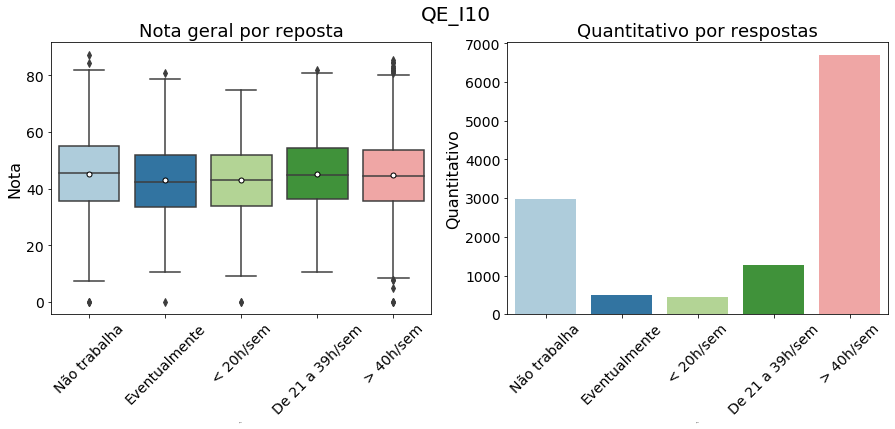

In [37]:
trab = {0 :'Não trabalha',
1 :'Eventualmente',
2:'< 20h/sem',
3 :'De 21 a 39h/sem',
4 :'> 40h/sem'}
my_box_plot('QE_I10', 'NT_GER', rotulos=trab, rotacao=45)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#seleciona as 20 colunas mais importantes pela covariancia
X_20 = SelectKBest(chi2, k=5).fit_transform(df_tratado[in_train], df_tratado['NT_CONCEITO'])
X_20

array([[2., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0.],
       [5., 0., 0., 0., 1.],
       ...,
       [2., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [39]:
X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(X_20,
                                                    df_tratado['NT_CONCEITO'],
                                                    test_size=0.2)

#cria um objeto classificador 
arvore_20 = tree.DecisionTreeClassifier(criterion='gini')
#Realiza o treinamento - X é o conjunto de entrada e Y é a respectiva classificação.
classificador_20 = arvore_20.fit(X_20_train, y_20_train)
#imprime a arovre no formato texto
#caracteristicas_20 = list(X_20.columns())
r_20 = export_text(classificador_20)#, feature_names=caracteristicas_20)
#print(r)

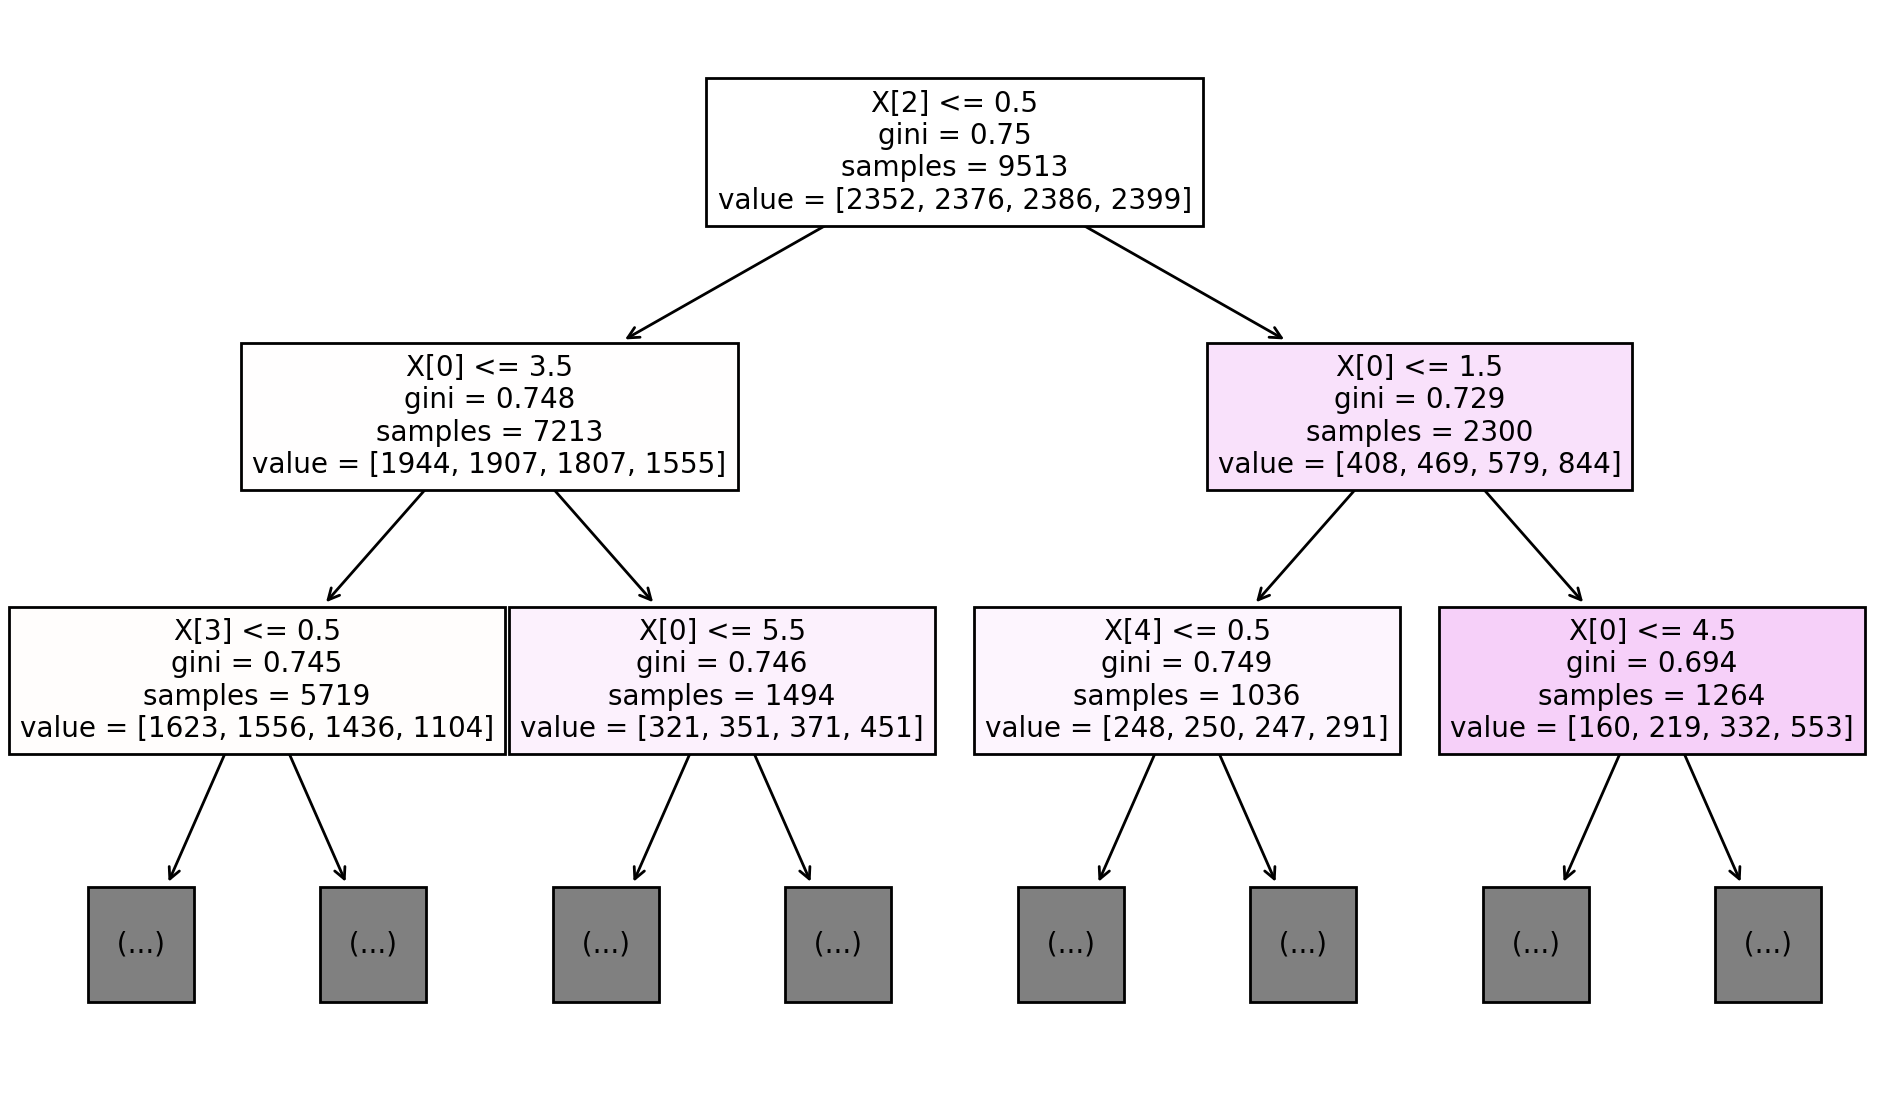

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7), dpi=200)
tree.plot_tree(arvore_20, filled=True, max_depth=2, fontsize=10)#, feature_names=caracteristicas_20
plt.show()

In [41]:
#USa a arvore para classificar o dataset de test. 
y_pred_20 = classificador_20.predict(X_20_test)

#compara as classificações calculadas pela árvore y_pred com a classificações original do dataset y_Test
print("Accuracy:",metrics.accuracy_score(y_20_test, y_pred_20))


Accuracy: 0.30601092896174864
